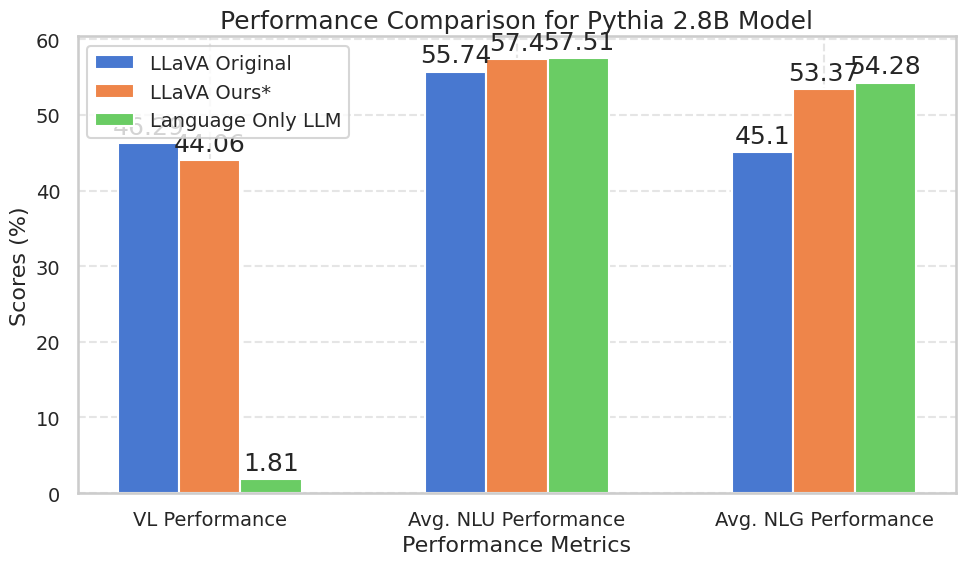

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['VL Performance', 'Avg. NLU Performance', 'Avg. NLG Performance']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]]
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]]
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]]
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA Original', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA Ours*', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Comparison for Pythia 2.8B Model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig('pythia_2p8b_performance_comparison.png')
plt.show()

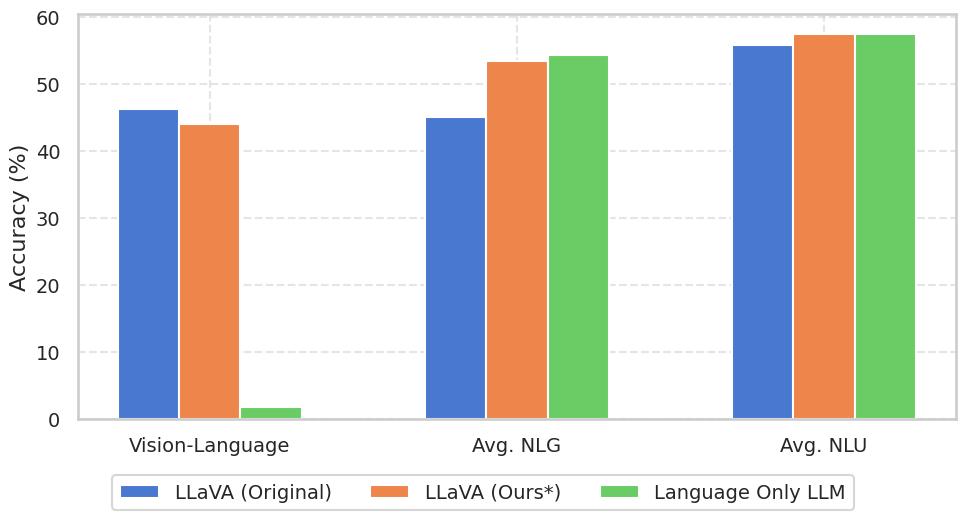

In [41]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [8, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['Vision-Language','Avg. NLG', 'Avg. NLU']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA (Original)', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA (Ours*)', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

# # Ensure labels are correctly placed
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height, 2)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Adjust layout to ensure everything fits
fig.tight_layout()
#plt.subplots_adjust(bottom=0.35, top=0.95, right=0.95, left=0.1)  # Adjust the padding as needed
plt.savefig('main_figure.png')
plt.show()

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [8, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-phi2+3b-repeat"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-phi2+3b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-phi2+3b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics
    elif 'stage-final-llava-v15-phi2+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['Vision-Language','Avg. NLG', 'Avg. NLU']
llava_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    nlg_performance_llava[llava_mapping[model_scale]],
    nlu_performance_llava[llava_mapping[model_scale]],
]
our_scores = [
    vl_performance_our[our_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
]
base_scores = [
    vl_performance_base[base_llm_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, llava_scores, width, label='LLaVA (Original)', color=sns.color_palette("muted")[0])
rects2 = ax.bar(x, our_scores, width, label='LLaVA (Ours*)', color=sns.color_palette("muted")[1])
rects3 = ax.bar(x + width, base_scores, width, label='Language Only LLM', color=sns.color_palette("muted")[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

# # Ensure labels are correctly placed
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height, 2)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# Adjust layout to ensure everything fits
fig.tight_layout()
#plt.subplots_adjust(bottom=0.35, top=0.95, right=0.95, left=0.1)  # Adjust the padding as needed
plt.savefig('main_figure.png')
plt.show()

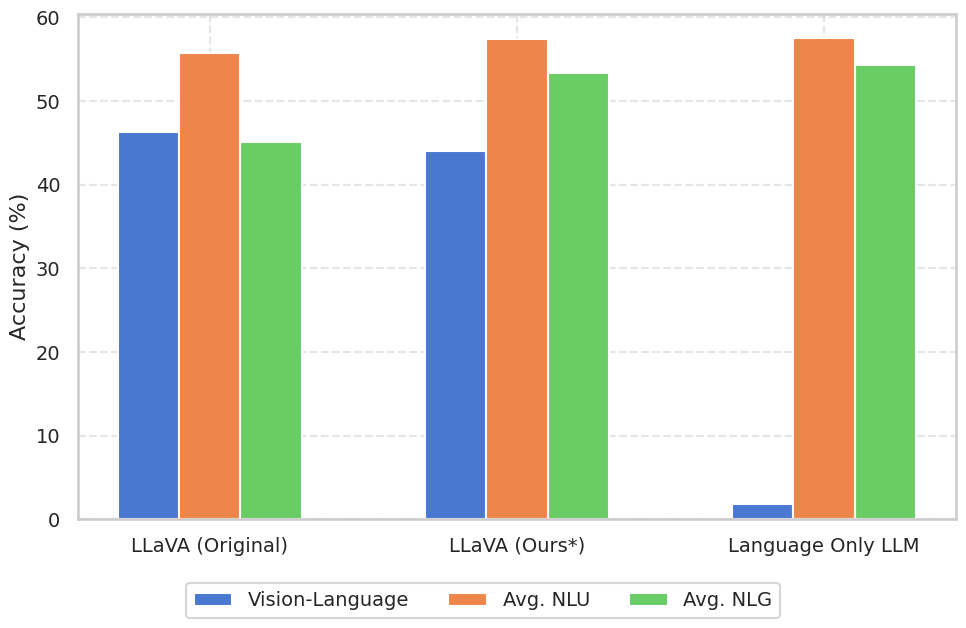

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, vl_scores, width, label='Vision-Language', color=sns.color_palette("muted")[0])
rects3 = ax.bar(x + width, nlg_scores, width, label='Avg. NLG', color=sns.color_palette("muted")[2])
rects2 = ax.bar(x, nlu_scores, width, label='Avg. NLU', color=sns.color_palette("muted")[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['Vision-Language', 'Avg. NLU', 'Avg. NLG'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

# Adjust layout to ensure everything fits
fig.tight_layout()

plt.savefig('pythia_2p8b_performance_comparison.png')
plt.show()

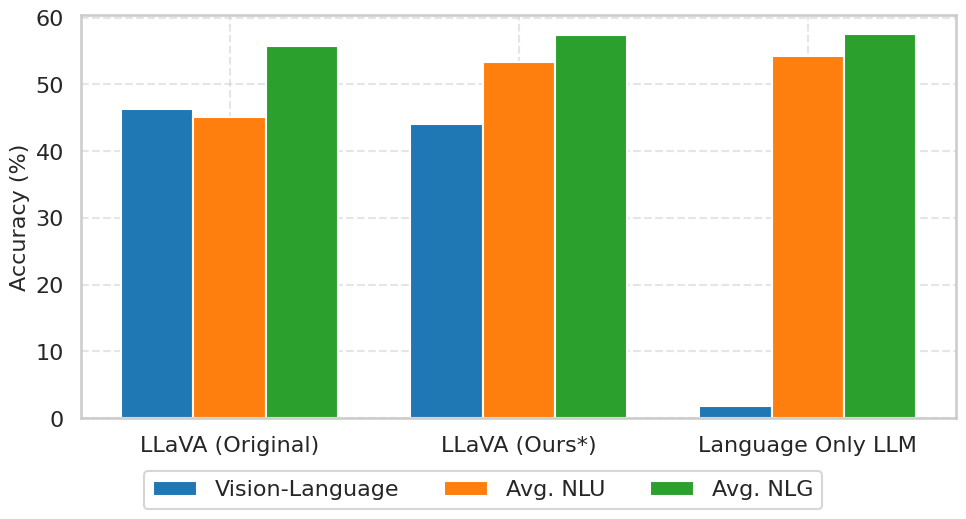

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['LLaVA (Original)', 'LLaVA (Ours*)', 'Language Only LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width, vl_scores, width, label='Vision-Language', color='#1f77b4')
rects2 = ax.bar(x, nlg_scores, width, label='Avg. NLG', color='#ff7f0e')
rects3 = ax.bar(x + width, nlu_scores, width, label='Avg. NLU', color='#2ca02c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Combine the legends
fig.legend(handles=[rects1, rects2, rects3],
           labels=['Vision-Language', 'Avg. NLU', 'Avg. NLG'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)


# Adjust layout to ensure everything fits
fig.tight_layout()
#plt.subplots_adjust(bottom=0.3, top=0.9, right=0.95, left=0.1)  # Adjust the padding as needed

plt.savefig('pythia_2p8b_performance_comparison.png')
plt.show()

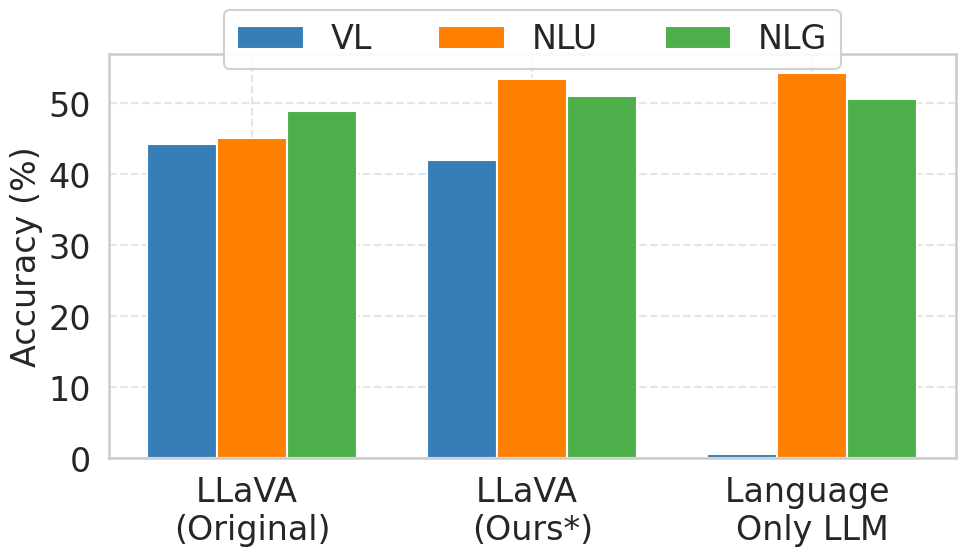

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CB = ['#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['LLaVA \n(Original)', 'LLaVA \n(Ours*)', 'Language \nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='Avg. NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='Avg. NLU', color=CB[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories)

#ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=25)
#ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=25)

# Combine the legends
#fig.legend(handles=[rects1, rects2, rects3],
#    labels=['Vision-Language', 'Avg. NLU', 'Avg. NLG'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

plt.legend(handles=[rects1, rects2, rects3],
    labels=['VL', 'NLU', 'NLG'], fontsize=24,
    loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, framealpha=0.9)

#fig.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
#              loc='lower left', fontsize='small')


# Adjust layout to ensure everything fits
plt.tight_layout()
#plt.subplots_adjust(bottom=0.3, top=0.9, right=0.95, left=0.1)  # Adjust the padding as needed

plt.savefig('pythia_2p8b_performance_comparison_latest.png', dpi=300)
plt.show()

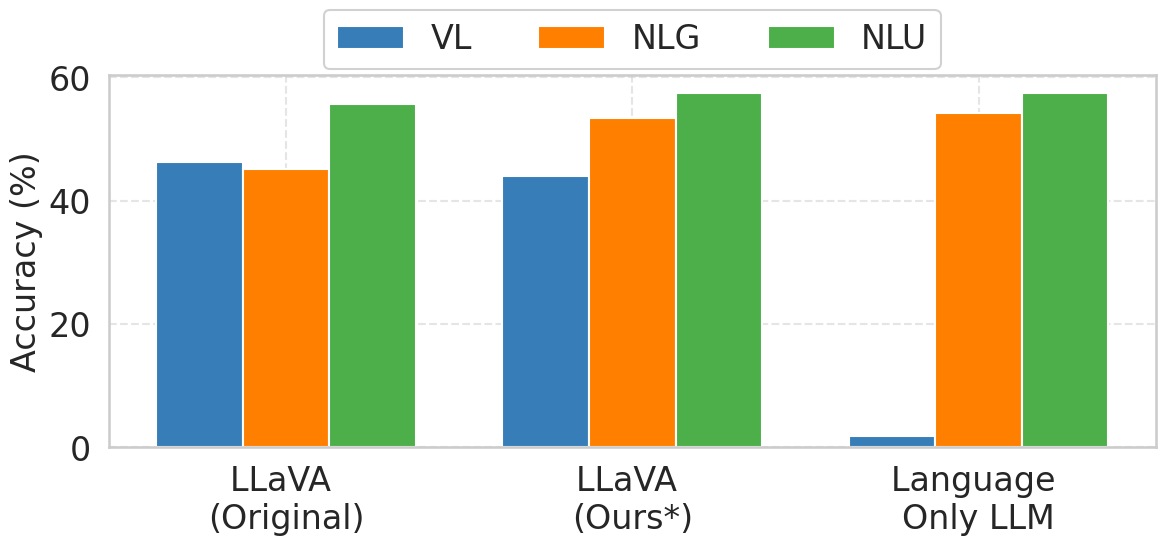

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CB = ['#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['LLaVA \n(Original)', 'LLaVA \n(Ours*)', 'Language \nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='Avg. NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='Avg. NLU', color=CB[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories)

#ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=25)
#ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=25)

# Combine the legends
#fig.legend(handles=[rects1, rects2, rects3],
#    labels=['Vision-Language', 'Avg. NLU', 'Avg. NLG'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

plt.legend(handles=[rects1, rects2, rects3],
    labels=['VL', 'NLG', 'NLU'], fontsize=24,
    loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, framealpha=0.9)

#fig.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
#              loc='lower left', fontsize='small')


# Adjust layout to ensure everything fits
plt.tight_layout()
#plt.subplots_adjust(bottom=0.3, top=0.9, right=0.95, left=0.1)  # Adjust the padding as needed

plt.savefig('main_figure.png', dpi=300)
plt.show()

### NeurIPS W: 

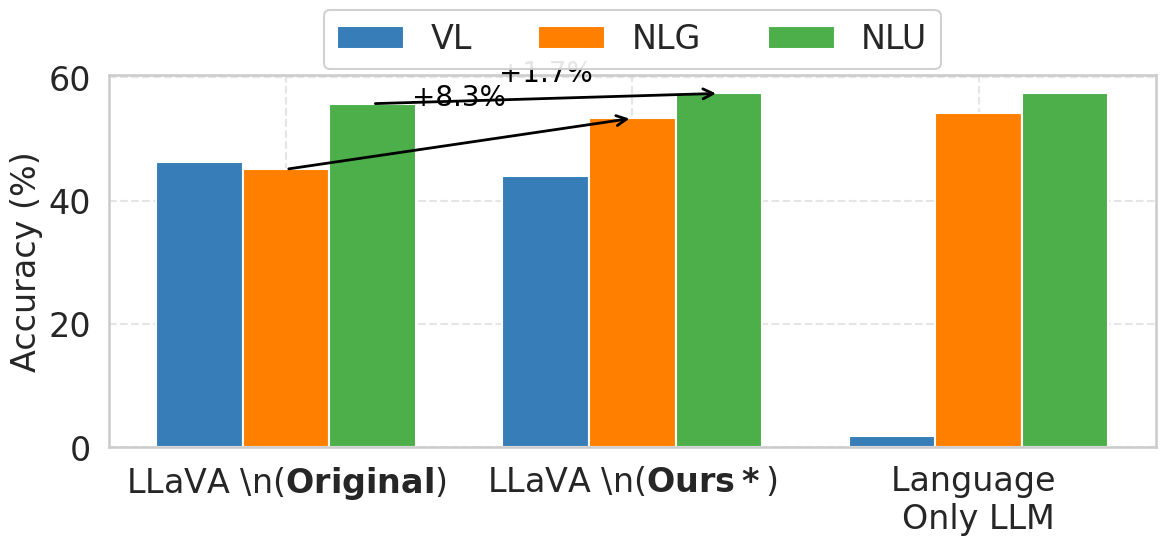

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

# Set seaborn and matplotlib styles
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart with bold labels for "Original" and "Ours*"
categories = [r"LLaVA \n($\mathbf{Original}$)", r'LLaVA \n($\mathbf{Ours*}$)', 'Language \nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as separate bars
rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='NLU', color=CB[2])

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Customize legend
plt.legend(handles=[rects1, rects2, rects3],
           labels=['VL', 'NLG', 'NLU'], fontsize=24,
           loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, framealpha=0.9)

# Add arrows to indicate performance gaps between Original and Ours*
# Calculate positions for arrows

# Function to get the center x position of a bar
def get_bar_center(bar):
    return bar.get_x() + bar.get_width() / 2

# NLG Arrow: From Original to Ours*
orig_nlg_bar = rects2[0]
ours_nlg_bar = rects2[1]
orig_nlg_x = get_bar_center(orig_nlg_bar)
orig_nlg_y = orig_nlg_bar.get_height()

ours_nlg_x = get_bar_center(ours_nlg_bar)
ours_nlg_y = ours_nlg_bar.get_height()

# Draw arrow for NLG
ax.annotate("",
            xy=(ours_nlg_x, ours_nlg_y),
            xytext=(orig_nlg_x, orig_nlg_y),
            arrowprops=dict(arrowstyle="->", color='black', lw=2),
            )

# NLU Arrow: From Original to Ours*
orig_nlu_bar = rects3[0]
ours_nlu_bar = rects3[1]
orig_nlu_x = get_bar_center(orig_nlu_bar)
orig_nlu_y = orig_nlu_bar.get_height()

ours_nlu_x = get_bar_center(ours_nlu_bar)
ours_nlu_y = ours_nlu_bar.get_height()

# Draw arrow for NLU
ax.annotate("",
            xy=(ours_nlu_x, ours_nlu_y),
            xytext=(orig_nlu_x, orig_nlu_y),
            arrowprops=dict(arrowstyle="->", color='black', lw=2),
            )

# Optionally, add labels for arrows indicating the performance improvement
# Calculate the difference
nlg_diff = ours_nlg_y - orig_nlg_y
nlu_diff = ours_nlu_y - orig_nlu_y

# Add text labels above the arrows if there is an improvement
if nlg_diff > 0:
    ax.text((orig_nlg_x + ours_nlg_x) / 2, max(orig_nlg_y, ours_nlg_y) + 1,
            f"+{nlg_diff:.1f}%", ha='center', va='bottom', fontsize=20, color='black')
if nlu_diff > 0:
    ax.text((orig_nlu_x + ours_nlu_x) / 2, max(orig_nlu_y, ours_nlu_y) + 1,
            f"+{nlu_diff:.1f}%", ha='center', va='bottom', fontsize=20, color='black')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save and show the plot
plt.savefig('main_figure.png', dpi=300)
plt.show()

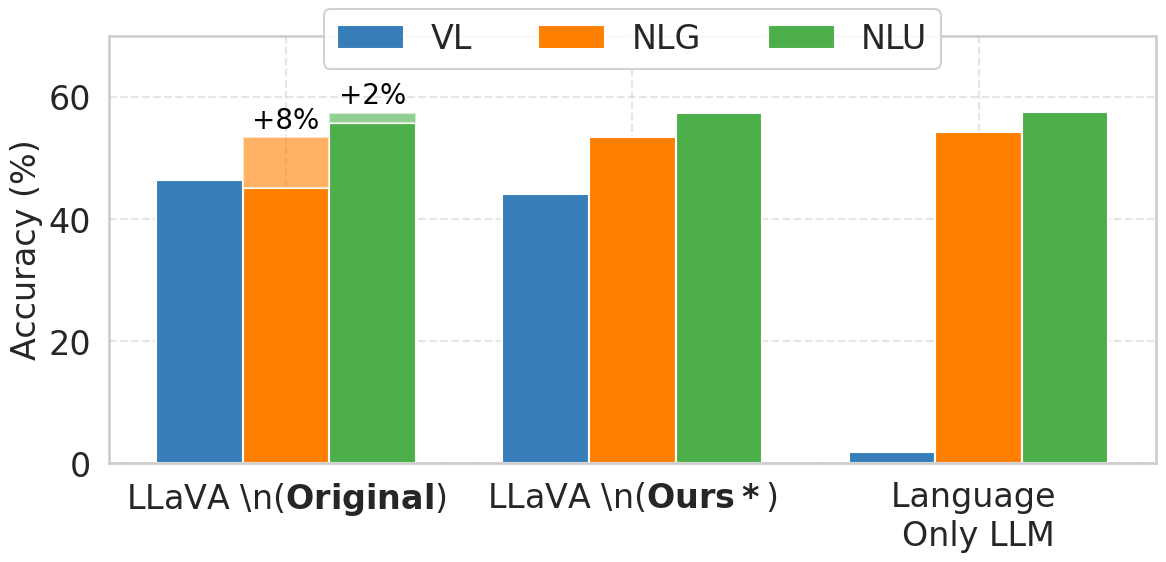

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

# Set seaborn and matplotlib styles
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart with bold labels for "Original" and "Ours*"
categories = [r"LLaVA \n($\mathbf{Original}$)", r"LLaVA \n($\mathbf{Ours*}$)", 'Language \nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Calculate differences between "Ours*" and "Original" for NLG and NLU
difference_nlg = nlg_performance_our[our_mapping[model_scale]] - nlg_performance_llava[llava_mapping[model_scale]]
difference_nlu = nlu_performance_our[our_mapping[model_scale]] - nlu_performance_llava[llava_mapping[model_scale]]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as separate bars
rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='NLU', color=CB[2])

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Customize legend
plt.legend(handles=[rects1, rects2, rects3],
           labels=['VL', 'NLG', 'NLU'], fontsize=24,
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, framealpha=0.9)

plt.ylim(0, 70)
# Function to get the center x position of a bar
def get_bar_center(bar):
    return bar.get_x() + bar.get_width() / 2

# Add gap bars for "Original" category (index 0)
# Only for NLG and NLU metrics
# Check if difference is positive to avoid negative bars
if difference_nlg > 0:
    rects2_gap = ax.bar(x[0], difference_nlg, width, bottom=nlg_scores[0],
                       color=CB[1], alpha=0.6)
    # Optionally, add a label indicating the improvement
    ax.text(x[0], nlg_scores[0] + difference_nlg + 0.5,
            f"+{difference_nlg:.0f}%", ha='center', va='bottom', fontsize=20, color='black')
    
if difference_nlu > 0:
    rects3_gap = ax.bar(x[0] + width, difference_nlu, width, bottom=nlu_scores[0],
                       color=CB[2], alpha=0.6)
    # Optionally, add a label indicating the improvement
    ax.text(x[0] + width, nlu_scores[0] + difference_nlu + 0.5,
            f"+{difference_nlu:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save and show the plot
plt.savefig('main_figure.png', dpi=300)
plt.show()

VL Performance Difference (Ours* - Original): -2.2%


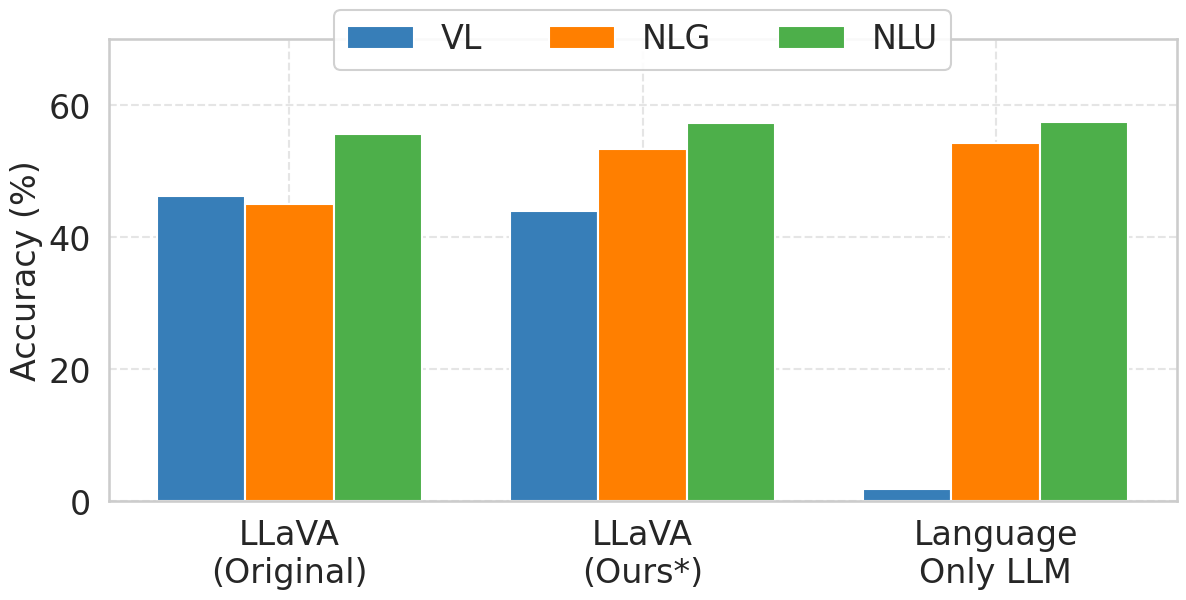

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

# Set seaborn and matplotlib styles
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart with bold labels for "Original" and "Ours*"
categories = ['LLaVA\n(Original)', 'LLaVA\n(Ours*)', 'Language\nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Calculate differences between "Ours*" and "Original" for VL, NLG, and NLU
difference_vl = vl_performance_our[our_mapping[model_scale]] - vl_performance_llava[llava_mapping[model_scale]]
difference_nlg = nlg_performance_our[our_mapping[model_scale]] - nlg_performance_llava[llava_mapping[model_scale]]
difference_nlu = nlu_performance_our[our_mapping[model_scale]] - nlu_performance_llava[llava_mapping[model_scale]]

# Print VL performance difference
print(f"VL Performance Difference (Ours* - Original): {difference_vl:.1f}%")

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as separate bars
rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='NLU', color=CB[2])

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=24)

# Customize legend
plt.legend(handles=[rects1, rects2, rects3],
           labels=['VL', 'NLG', 'NLU'], fontsize=24,
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, framealpha=0.9)

# Set y-axis limit for better visualization
plt.ylim(0, 70)

# Function to get the center x position of a bar
def get_bar_center(bar):
    return bar.get_x() + bar.get_width() / 2

# Add gap bars for "Original" category (index 0)
# Only for VL, NLG, and NLU metrics
# Check if difference is positive to avoid negative bars
#if difference_vl > 0:
# rects1_gap = ax.bar(x[0] - width, difference_vl, width, bottom=vl_scores[0],
#                     color=CB[0], alpha=0.6)
# # Add a label indicating the improvement
# ax.text(x[0] - width, vl_scores[0] + difference_vl + 0.5,
#         f"{difference_vl:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# if difference_nlg > 0:
#     rects2_gap = ax.bar(x[0], difference_nlg, width, bottom=nlg_scores[0],
#                        color=CB[1], alpha=0.6)
#     # Add a label indicating the improvement
#     ax.text(x[0], nlg_scores[0] + difference_nlg + 0.5,
#             f"+{difference_nlg:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# if difference_nlu > 0:
#     rects3_gap = ax.bar(x[0] + width, difference_nlu, width, bottom=nlu_scores[0],
#                        color=CB[2], alpha=0.6)
#     # Add a label indicating the improvement
#     ax.text(x[0] + width, nlu_scores[0] + difference_nlu + 0.5,
#             f"+{difference_nlu:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.16, left=0.09, right=0.98)
# Save and show the plot
plt.savefig('main_figure.png', dpi=300)
plt.show()

In [1]:
# Narrow version of above.

VL Performance Difference (Ours* - Original): -2.2%


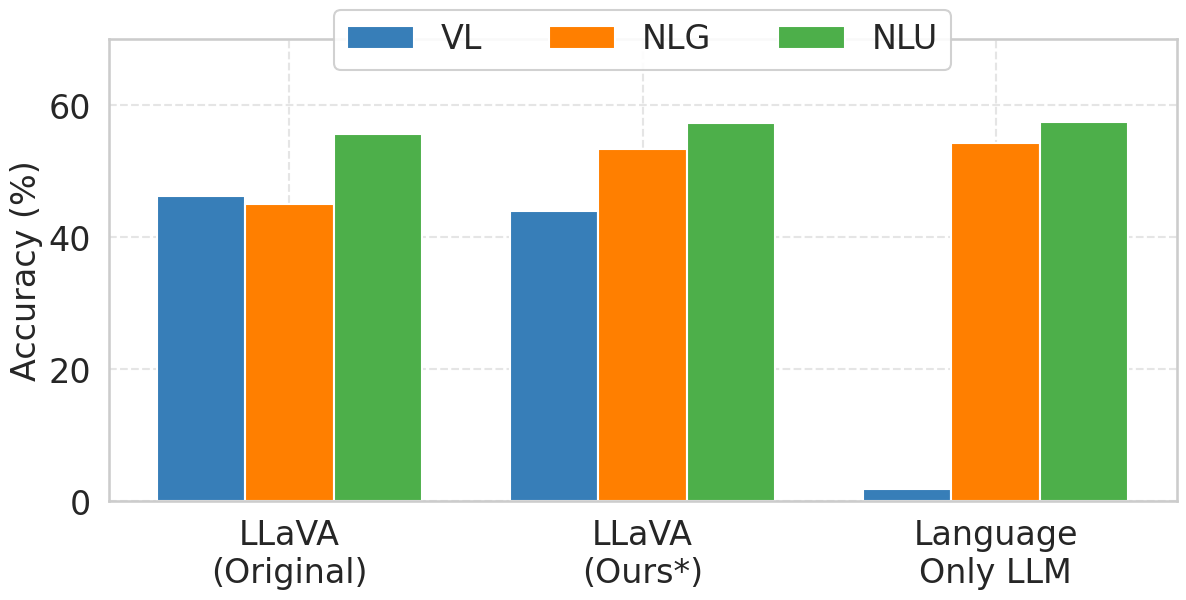

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

# Set seaborn and matplotlib styles
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [10, 6],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart with bold labels for "Original" and "Ours*"
categories = ['LLaVA\n(Original)', 'LLaVA\n(Ours*)', 'Language\nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Calculate differences between "Ours*" and "Original" for VL, NLG, and NLU
difference_vl = vl_performance_our[our_mapping[model_scale]] - vl_performance_llava[llava_mapping[model_scale]]
difference_nlg = nlg_performance_our[our_mapping[model_scale]] - nlg_performance_llava[llava_mapping[model_scale]]
difference_nlu = nlu_performance_our[our_mapping[model_scale]] - nlu_performance_llava[llava_mapping[model_scale]]

# Print VL performance difference
print(f"VL Performance Difference (Ours* - Original): {difference_vl:.1f}%")

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as separate bars
rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='NLU', color=CB[2])

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=24)

# Customize legend
plt.legend(handles=[rects1, rects2, rects3],
           labels=['VL', 'NLG', 'NLU'], fontsize=24,
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, framealpha=0.9)

# Set y-axis limit for better visualization
plt.ylim(0, 70)

# Function to get the center x position of a bar
def get_bar_center(bar):
    return bar.get_x() + bar.get_width() / 2

# Add gap bars for "Original" category (index 0)
# Only for VL, NLG, and NLU metrics
# Check if difference is positive to avoid negative bars
#if difference_vl > 0:
# rects1_gap = ax.bar(x[0] - width, difference_vl, width, bottom=vl_scores[0],
#                     color=CB[0], alpha=0.6)
# # Add a label indicating the improvement
# ax.text(x[0] - width, vl_scores[0] + difference_vl + 0.5,
#         f"{difference_vl:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# if difference_nlg > 0:
#     rects2_gap = ax.bar(x[0], difference_nlg, width, bottom=nlg_scores[0],
#                        color=CB[1], alpha=0.6)
#     # Add a label indicating the improvement
#     ax.text(x[0], nlg_scores[0] + difference_nlg + 0.5,
#             f"+{difference_nlg:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# if difference_nlu > 0:
#     rects3_gap = ax.bar(x[0] + width, difference_nlu, width, bottom=nlu_scores[0],
#                        color=CB[2], alpha=0.6)
#     # Add a label indicating the improvement
#     ax.text(x[0] + width, nlu_scores[0] + difference_nlu + 0.5,
#             f"+{difference_nlu:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.16, left=0.09, right=0.98)
# Save and show the plot
plt.savefig('main_figure_narrow.png', dpi=300)
plt.show()

VL Performance Difference (Ours* - Original): -2.2%


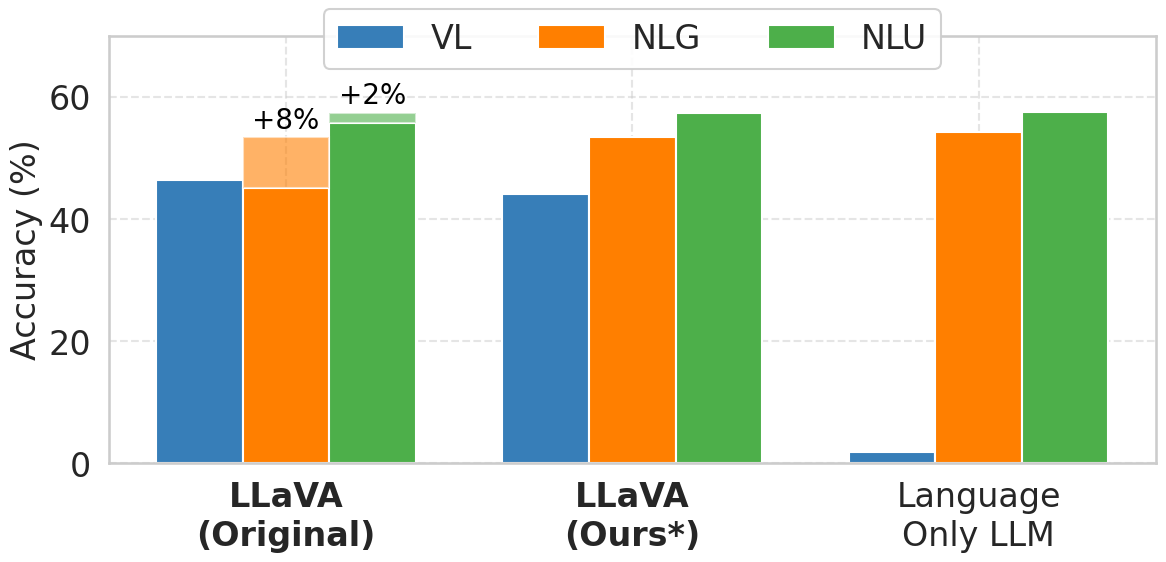

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
CB = ['#377eb8', '#ff7f00', '#4daf4a',
      '#f781bf', '#a65628', '#984ea3',
      '#999999', '#e41a1c', '#dede00']

# Set seaborn and matplotlib styles
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('../results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart with bold labels for "Original" and "Ours*"
raw_categories = ['LLaVA\n(Original)', 'LLaVA\n(Ours*)', 'Language\nOnly LLM']
categories = raw_categories  # We'll handle bolding separately

vl_scores = [
    vl_performance_llava.get(llava_mapping[model_scale], np.nan),
    vl_performance_our.get(our_mapping[model_scale], np.nan),
    vl_performance_base.get(base_llm_mapping[model_scale], np.nan),
]
nlu_scores = [
    nlu_performance_llava.get(llava_mapping[model_scale], np.nan),
    nlu_performance_our.get(our_mapping[model_scale], np.nan),
    nlu_performance_base.get(base_llm_mapping[model_scale], np.nan),
]
nlg_scores = [
    nlg_performance_llava.get(llava_mapping[model_scale], np.nan),
    nlg_performance_our.get(our_mapping[model_scale], np.nan),
    nlg_performance_base.get(base_llm_mapping[model_scale], np.nan),
]

# Calculate differences between "Ours*" and "Original" for VL, NLG, and NLU
difference_vl = vl_performance_our.get(our_mapping[model_scale], np.nan) - vl_performance_llava.get(llava_mapping[model_scale], np.nan)
difference_nlg = nlg_performance_our.get(our_mapping[model_scale], np.nan) - nlg_performance_llava.get(llava_mapping[model_scale], np.nan)
difference_nlu = nlu_performance_our.get(our_mapping[model_scale], np.nan) - nlu_performance_llava.get(llava_mapping[model_scale], np.nan)

# Print VL performance difference
print(f"VL Performance Difference (Ours* - Original): {difference_vl:.1f}%")

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as separate bars
rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='NLU', color=CB[2])

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=24)

# Customize legend
plt.legend(handles=[rects1, rects2, rects3],
           labels=['VL', 'NLG', 'NLU'], fontsize=24,
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, framealpha=0.9)

# Set y-axis limit for better visualization
plt.ylim(0, 70)

# Add gap bars for "Original" category (index 0)
# Only for VL, NLG, and NLU metrics
# Check if difference is positive to avoid negative bars
if not np.isnan(difference_vl) and difference_vl > 0:
    rects1_gap = ax.bar(x[0] - width, difference_vl, width, bottom=vl_scores[0],
                       color=CB[0], alpha=0.6)
    # Add a label indicating the improvement
    ax.text(x[0] - width, vl_scores[0] + difference_vl + 0.5,
            f"+{difference_vl:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

if not np.isnan(difference_nlg) and difference_nlg > 0:
    rects2_gap = ax.bar(x[0], difference_nlg, width, bottom=nlg_scores[0],
                       color=CB[1], alpha=0.6)
    # Add a label indicating the improvement
    ax.text(x[0], nlg_scores[0] + difference_nlg + 0.5,
            f"+{difference_nlg:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

if not np.isnan(difference_nlu) and difference_nlu > 0:
    rects3_gap = ax.bar(x[0] + width, difference_nlu, width, bottom=nlu_scores[0],
                       color=CB[2], alpha=0.6)
    # Add a label indicating the improvement
    ax.text(x[0] + width, nlu_scores[0] + difference_nlu + 0.5,
            f"+{difference_nlu:.0f}%", ha='center', va='bottom', fontsize=20, color='black')

# Bold the entire label for "Original" and "Ours*"
for label in ax.get_xticklabels():
    text = label.get_text()
    if 'Original' in text or 'Ours*' in text:
        label.set_fontweight('bold')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save and show the plot
plt.savefig('main_figure.png', dpi=300)
plt.show()

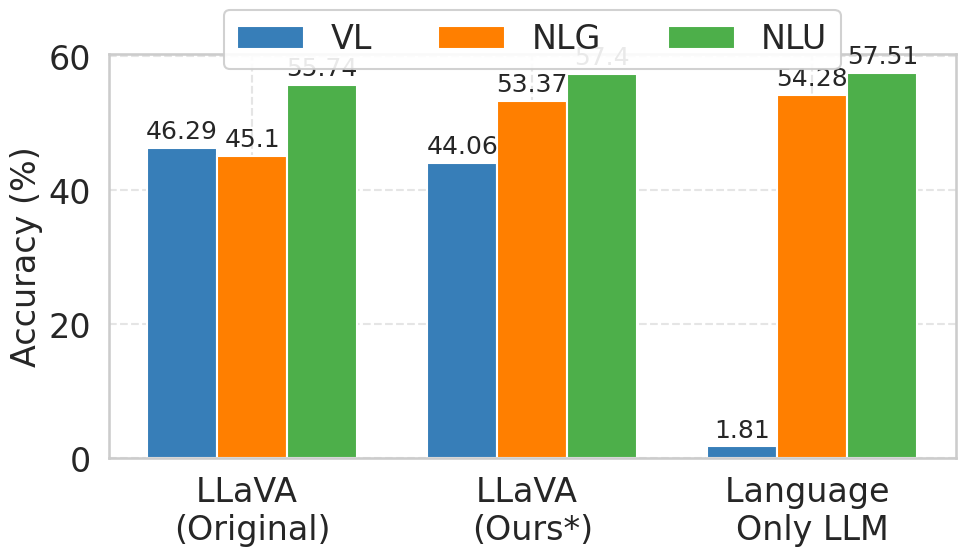

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CB = ['#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00']

sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Load the JSON data from the file
with open('results_A.json', 'r') as f:
    results = json.load(f)

# Define the filtering criteria and datasets
nlu_datasets = ["wsc273", "winogrande", "arc_easy", "arc_challenge"]
nlg_datasets = ["lambada_standard"]
vl_datasets = ["vqa-v2", "textvqa-ocr", "textvqa-pure", "gqa"]

# Define model scale to model name mapping for Pythia 2.8B model
model_scale = 2.8

llava_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b"
}

our_mapping = {
    model_scale: "stage-final-llava-v15-pythia+2p8b-soft"
}

base_llm_mapping = {
    model_scale: "reproduction-align-pythia+2p8b"
}

# Filter and categorize models
filtered_results = {
    'our_method': {},
    'llava_method': {},
    'base_llm': {}
}

for model_name, metrics in results.items():
    if model_name.endswith('soft'):
        filtered_results['our_method'][model_name] = metrics
    elif 'reproduction-align' in model_name:
        filtered_results['base_llm'][model_name] = metrics
    elif 'stage-final-llava-v15-pythia+' in model_name and 'soft' not in model_name:
        filtered_results['llava_method'][model_name] = metrics

# Calculate average performances
def calculate_performance(metrics, datasets):
    performances = {}
    for model, data in metrics.items():
        scores = [data.get(dataset, np.nan) * 100 for dataset in datasets]
        valid_scores = [score for score in scores if not np.isnan(score)]
        performances[model] = np.mean(valid_scores) if valid_scores else np.nan
    return performances

# VL performance
vl_performance_our = calculate_performance(filtered_results['our_method'], vl_datasets)
vl_performance_llava = calculate_performance(filtered_results['llava_method'], vl_datasets)
vl_performance_base = calculate_performance(filtered_results['base_llm'], vl_datasets)

# NLU performance
nlu_performance_our = calculate_performance(filtered_results['our_method'], nlu_datasets)
nlu_performance_llava = calculate_performance(filtered_results['llava_method'], nlu_datasets)
nlu_performance_base = calculate_performance(filtered_results['base_llm'], nlu_datasets)

# NLG performance
nlg_performance_our = calculate_performance(filtered_results['our_method'], nlg_datasets)
nlg_performance_llava = calculate_performance(filtered_results['llava_method'], nlg_datasets)
nlg_performance_base = calculate_performance(filtered_results['base_llm'], nlg_datasets)

# Prepare data for the bar chart
categories = ['LLaVA \n(Original)', 'LLaVA \n(Ours*)', 'Language \nOnly LLM']
vl_scores = [
    vl_performance_llava[llava_mapping[model_scale]],
    vl_performance_our[our_mapping[model_scale]],
    vl_performance_base[base_llm_mapping[model_scale]],
]
nlu_scores = [
    nlu_performance_llava[llava_mapping[model_scale]],
    nlu_performance_our[our_mapping[model_scale]],
    nlu_performance_base[base_llm_mapping[model_scale]],
]
nlg_scores = [
    nlg_performance_llava[llava_mapping[model_scale]],
    nlg_performance_our[our_mapping[model_scale]],
    nlg_performance_base[base_llm_mapping[model_scale]],
]

# Plotting the bar chart
x = np.arange(len(categories))
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, vl_scores, width, label='VL', color=CB[0])
rects2 = ax.bar(x, nlg_scores, width, label='Avg. NLG', color=CB[1])
rects3 = ax.bar(x + width, nlu_scores, width, label='Avg. NLU', color=CB[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(categories)

#ax.tick_params(axis='both', which='major', width=2, length=10, labelsize=25)
#ax.tick_params(axis='both', which='minor', width=2, length=10, labelsize=25)

# Combine the legends
#fig.legend(handles=[rects1, rects2, rects3],
#    labels=['Vision-Language', 'Avg. NLU', 'Avg. NLG'], loc='lower center', bbox_to_anchor=(0.5, -0.075), ncol=3)

plt.legend(handles=[rects1, rects2, rects3],
    labels=['VL', 'NLG', 'NLU'], fontsize=24,
    loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, framealpha=0.9)

#fig.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
#              loc='lower left', fontsize='small')

# Ensure labels are correctly placed
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Adjust layout to ensure everything fits
plt.tight_layout()
#plt.subplots_adjust(bottom=0.3, top=0.9, right=0.95, left=0.1)  # Adjust the padding as needed

plt.savefig('pythia_2p8b_performance_comparison_latest.png', dpi=300)
plt.show()


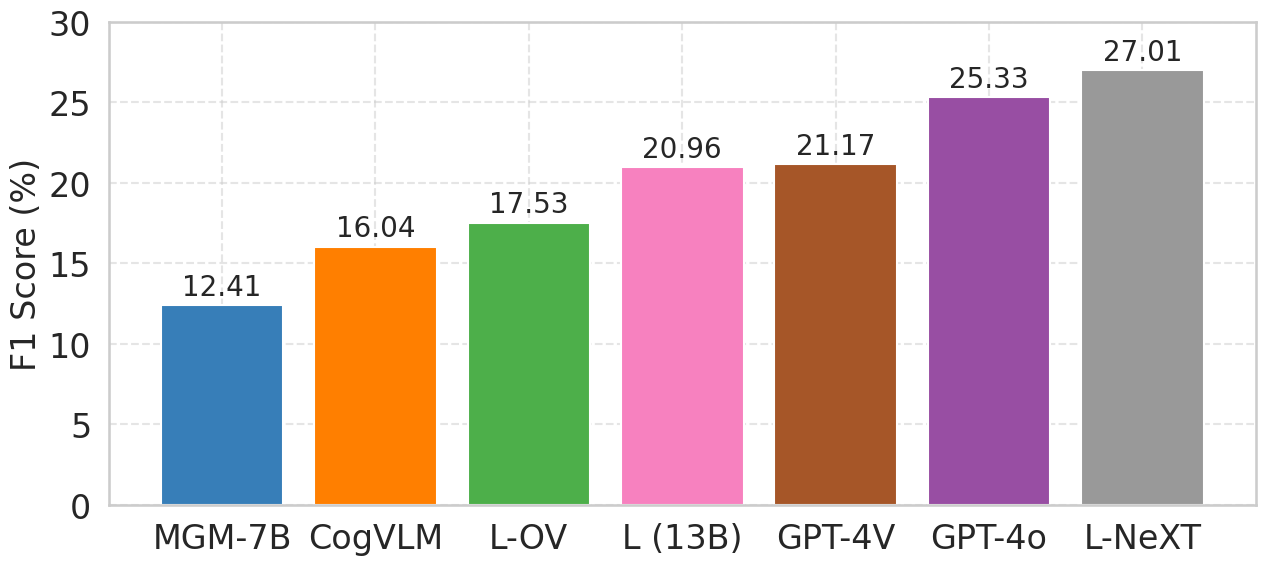

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data from the table (ordered by ascending F1 score)
models = ['MGM-7B', 'CogVLM', 'L-OV', 'L (13B)', 'GPT-4V', 'GPT-4o', 'L-NeXT']
micro_f1_scores = [12.41, 16.04, 17.53, 20.96, 21.17, 25.33, 27.01]

# Color palette for the bars
CB = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c']

# Set the style and context
sns.set(style="whitegrid")
sns.set_palette("muted")
sns.set_context("talk")
plt.rcParams.update({
    'axes.labelsize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
    'figure.figsize': [12, 8],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

plt.rcParams["figure.autolayout"] = True

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(13, 6))
bars = ax.bar(models, micro_f1_scores, color=CB[:len(models)])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score (%)', fontsize=24)
ax.set_ylim(0, 30)

# Adding the scores on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=20)
# Adjust layout to ensure everything fits
plt.tight_layout()
# Save the figure
plt.savefig('micro_f1_scores_comparison.png', dpi=300)
plt.show()